# Tarea 4


## Caracteristicas

### Limones

1. distancia al centroide de cada punto no varia mucho con respecto a la distancia promedio de todos los pixeles al centroide
2. circular/ovalado
3. diametro 1 circulo hough > x numero definido por el diametro de la arandela, es decir mucho mayor al diametro de la arandela
4. gran cantidad de pixeles

### Arandelas

1. circular
2. centro con pocos pixeles
3. pocos pixeles
4. l y h muy pequeños
5. centroide es de un valor diferente de los pixeles del objeto

### Clavos

1. largos
2. brillantes
3. cabeza larga
4. distancia al centroide de varios puntos varia mucho con respecto a la distancia promedio de todos los pixeles al centroide
5. delgados

### Expander

1. largo, menos largo que un clavo
2. delgado, mas ancho que el clavo
3. puede tener patitas
4. 


### Prensa

1. similar en largo que expander, menos que clavo
2. simitria a lo largo
3. corte transversal una mitad mas ancha que la otra
4. 

In [2]:
#Importar las librerías por utilizar
import os
import numpy as np
from skimage import io
from skimage.transform import resize, probabilistic_hough_line,hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.draw import circle_perimeter

#Obtener la direccion de las imagenes
path = os.getcwd()

In [3]:
N_SEEDS = 760

# 8-vecindad
VECINDAD = [
    (-1,-1), (-1, 0), (-1, 1),
    ( 0,-1),          ( 0, 1),
    ( 1,-1), ( 1, 0), ( 1, 1)]


In [4]:
def centroides_dados_draft(puntos):
    image_array = puntos
    #image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
    #kmeans = KMeans(n_clusters=3, random_state=0).fit(image_array_sample)
    kmeans = KMeans(n_clusters=3, random_state=0).fit(puntos)
    #labels = kmeans.predict(image_array)
    colores = kmeans.cluster_centers_
    return colores

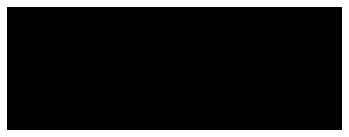

In [7]:
#Imagen original
file_path = os.path.join(path , 'Imagen_a_utilizar.jpeg')
img_org = io.imread(file_path, as_gray=True)
img_edges = canny(img_org, 2, 1, 25)
# imagen de pixeles visitados, evita revisitar pixeles
visitado = np.zeros(shape=(img_edges.shape), dtype=np.uint8)
plt.imshow(img_edges, cmap='gray')
plt.axis('off')
plt.savefig('Segmentacion 3.jpg', bbox_inches='tight')

In [9]:
def generate_seeds(img):
    #shape = y,x
    shape = img.shape
    #cada semilla se guarda como x,y
    seeds = np.zeros((N_SEEDS,2), dtype=np.uint16)
    for i in range(N_SEEDS):
        #punto en x
        x = np.random.randint(0,shape[1])
        #punto en y
        y = np.random.randint(0,shape[0])
        if img[y][x] == False:
            seeds[i][0] = x
            seeds[i][1] = y
    return seeds


def region_growth1(seed, bin_img, visitado, out_img = np.zeros(shape=(320,240,3), dtype=np.uint8)):  
    h, w = bin_img.shape
    region = [seed]
    # Crecimiento de la región
    while len(region):
        seed = region.pop(0)
        x = seed[0]
        y = seed[1]
        # Marca la semilla como visitada
        visitado[y][x] = 1
        for vecino in VECINDAD:
            cur_x = x + vecino[0]
            cur_y = y + vecino[1]
            # limites de la imagen
            if cur_x <0 or cur_y<0 or cur_x >= w or cur_y >=h :
                continue
            # crea nueva semilla si el pixel actual es igual a la semilla
            # y si aun no está visitado, marca pixel actual como visitado
            if (not visitado[cur_y][cur_x]) and (bin_img[cur_y][cur_x]==bin_img[y][x]):
                out_img[cur_y][cur_x] = True
                visitado[cur_y][cur_x] = 1
                region.append((cur_x,cur_y))
    return out_img

def region_growth(seed, img, visitado):
    h, w = img.shape
    out_img = np.zeros(img.shape, dtype=np.uint8)
    region = [seed]
    # Crecimiento de la región
    while len(region):
        seed = region.pop(0)
        x = seed[0]
        y = seed[1]
        # Marca la semilla como visitada
        visitado[y][x] = 1
        for vecino in VECINDAD:
            cur_x = x + vecino[0]
            cur_y = y + vecino[1]
            # limites de la imagen
            if cur_x <0 or cur_y<0 or cur_x >= w or cur_y >=h :
                continue
            # crea nueva semilla si el pixel actual es similar a la semilla
            # y si aun no está visitado, marca pixel actual como visitado
            if (not visitado[cur_y][cur_x]) and (img[cur_y][cur_x] == img[y][x]):
                out_img[cur_y][cur_x] = True
                visitado[cur_y][cur_x] = 1
                region.append((cur_x,cur_y))
    return out_img

